# Obtaining the optimal parameters for AO expansions (coefficients, exponents)

In [1]:
from IPython.display import display,Math
import numpy as np
import matplotlib.pyplot as plt

### -1-
####  Consider the Hamiltonian of an H atom  
#### $$\hat H_{el} = -1/2 \nabla^2 - \frac{1}{r} $$  (a.u.) where  
#### $$\nabla^2= \frac{\partial^2}{\partial r^2} + \frac{2}{r}\frac{\partial}{\partial r} + \frac{1}{2r^2} \hat L^2  $$  
#### and, by applying the variational method,  use a gaussian type 1s orbital to estimate the energy of its ground state . 
#### What is the error for this trial function? (use  $\alpha_{opt}= 8/(9\pi)$)

1) First, use the 1s-GTO centered at $\vec 0$ point
$$\chi_{1s}^{GTO}(\alpha, r-\vec 0 )= N e^{-\alpha |{r-\vec 0}|^2}$$  
2) Note that since this is not a function of $\theta,\phi$, $\chi_{1s}^{GTO}(\alpha, r)$ is not an eigenfunction of $\hat L^2$ ($\hat L^2 |\chi_{1s}^{STO}(\alpha, r)> \space = \space  0 |\chi_{1s}^{GTO}(\alpha, r)> $) and then 
$$-1/2\nabla^2  |\chi_{1s}^{GTO}(\alpha, r)> \space = \left(- \frac{\partial^2}{2\partial r^2} - \frac{1}{r}\frac{\partial}{\partial r} \right)  |\chi_{1s}^{GTO}(\alpha, r)> \space$$
with $ \hat T =-1/2\nabla^2 $, and if $\hat V(r) = 1/r$ so that $ \hat H_{el} = \hat T  +\hat V$:
$$ \hat H_{el} |\chi_{1s}^{GTO}(\alpha, r)> \space = \left(- \frac{\partial^2}{2\partial r^2} - \frac{1}{r}\frac{\partial}{\partial r} - \frac{1}{r} \right)  |\chi_{1s}^{GTO}(\alpha, r)> \space$$
3) Apply Variational method:  
We use the general expression for non-necessarily normalized wavefunctions of the variational integral as a function of the $(\alpha_i,\alpha_j)$ exponents, $\mathcal{W}(\alpha_i,\alpha_j)$:  
$$ \mathcal{W}(\alpha_i,\alpha_j)_{ij} = \frac{<\chi_{1s}^{GTO}(\alpha_i)|\hat H_{el}|\chi_{1s}^{GTO}(\alpha_j)>}{<\chi_{1s}^{GTO}(\alpha_i)|\chi_{1s}^{GTO}(\alpha_j)>} = \frac{T_{ij}+V_{ij}}{S_{ij}} $$ 
where all three $T_{ij},V_{ij}, S_{ij} = \mathcal{f}(\alpha_i,\alpha_j)$. Note $ \mathcal{W}(\alpha_i,\alpha_j)_{ij} \neq \mathcal{f}(N)$
4) Get the expressions for the above non-normalized $T_{ij},V_{ij}, S_{ij}$ integrals
$$T_{ij}=\int_0^\infty e^{-\alpha_i r^2} \left(- \frac{\partial^2}{2\partial r^2} - \frac{1}{r}\frac{\partial}{\partial r} \right) e^{-\alpha_i r^2} d^3 r = ... = \frac{3\alpha_i\alpha_j\pi^{3/2}}{(\alpha_i+\alpha_j)^{5/2}} $$
$$V_{ij}=\int_0^\infty e^{-\alpha_i r^2} \frac{1}{r} e^{-\alpha_i r^2} d^3 r  = \frac{-2\pi}{\alpha_i+\alpha_j} $$
$$S_{ij}=\int_0^\infty e^{-\alpha_i r^2} e^{-\alpha_i r^2} d^3 r = \left(\frac{\pi}{\alpha_i+\alpha_j}\right)^{3/2} $$
5) Sustitute to  $\mathcal{W}$  
(Note  $\mathcal{W}\equiv\mathcal{W}(\alpha_i,\alpha_j)$ since $\alpha_i=\alpha_j=\alpha$ because we minimize w.r.t a single 1s spinorbital coefficient). 
After introducing this change in the previous expressions for hamiltonian and overlap matrix elements we obtain that  
$$\mathcal{W} = \frac{3}{2}\alpha - \frac{2\sqrt2}{\sqrt\pi}\sqrt{\alpha} $$
6) And minimize it w.r.t the $\alpha$ coefficient, 
i.e.: find the $\alpha$ satisfying $\frac{\partial\mathcal{W}}{\partial\alpha}=0$  
$$\frac{\partial\mathcal{W}}{\partial\alpha}= \frac{3}{2} - \frac{\sqrt2}{\sqrt\pi\sqrt\alpha}=0 $$
- Hints: We will use Newton-Raphson algorithm for root-finding using 1st derivative ($x_{n+1}=x_n - \frac{f(x_n)}{f'(x_n)}$) and the derivative is computed analitycally in the NR method using the central finit differences using $h=$1E-06

In [2]:
#define fuctions
def dW_da(a):
    return 3/2 - (np.sqrt(2)/np.sqrt(np.pi))*a**(-1/2)

def df_dx(x,f):
    h=float(1e-5)
    return (f(x+h)-f(x-h))/(2*h)

def NR(x,df_dx,f):
    n_it= 0
    n_max=250
    while abs(dW_da(x))>1e-8 and n_it<n_max:
        x= x - f(x)/df_dx(x,f)
        #to avoid div by 0
        if abs(df_dx(x,f)) < 0.5e-8:
            x = x
        elif n_it==n_max:
            print('Convergence not met after', n_max, 'iterations')
    return x

#MAIN 
a0=0.01
a_ex=8/(9*np.pi)
a_opt=NR(a0,df_dx,dW_da)
print('a_opt=', a_opt)
E_aopt= 3/2*a_opt- (2*np.sqrt(2)/np.sqrt(np.pi))*np.sqrt(a_opt)
print('E(a_opt)=', E_aopt,'ha')

if abs(a_opt-a_ex)<1e-10:
    print(f'a_opt={a_opt:.15f} found dont differ significantly on the exact a_ex={a_ex:.15f}')
    print(f'This implies a relative error of {100*(abs(-0.5-E_aopt)/(0.5)):.2f} %')
else:
    print('you did so bad')
    print('Computi sense vergonya, computi en català, i si t\'equivoques, torna i començar!')
    

a_opt= 0.28294212105115213
E(a_opt)= -0.42441318157838775 ha
a_opt=0.282942121051152 found dont differ significantly on the exact a_ex=0.282942121052258
This implies a relative error of 15.12 %


### -2-
####  Consider an 1s STO orbital with $\zeta=1.0$  and calculate the optimal exponent for a STO-1G orbital by maximizing their overlap integral
#### $$ S = \int \chi_p^{STO}(\zeta=1.0,r) \chi_p^{STO-NG}(\zeta=1.0,r) d^3r $$ 
####   What is the error in the energy for this function?

1) A contracted gaussian-type orb CGO (or STO-NG) is  
$$\chi_{1s}^{CGO}(r,\theta,\omega)= \sum_{p=1}^N d_p \chi_p^{GTO}(r,\theta,\omega)$$ 
so $\chi_{1s}^{STO-1G}=\chi_{1s}^{GTO}$
2) An STO is
$$\chi_{1s}^{STO}(\zeta, r-\vec 0 )= \sqrt{(\zeta^3/\pi)} e^{-\zeta |{r-\vec 0}|}$$
3) Since in STO-1G there is no contraction coefficient or is $d_1=1.00$, we only need to find the gaussian $\alpha$ exponent that maximizes the overlap integral, which is for STO-1G   
$$ S = \pi^{-1/2}\left(\frac{2\alpha}{\pi}\right)^{3/4}\int e^{-r} e^{-\alpha r^2} dr d\theta d\omega = \pi^{-1/2}\left(\frac{2\alpha}{\pi}\right)^{3/4}\int e^{-r} e^{-\alpha r^2} r^2  dr$$ 
4) Finally, just as before the energy as a function of $\alpha$ is $\mathcal{W} = \frac{3}{2}\alpha - \frac{2\sqrt2}{\sqrt\pi}\sqrt{\alpha} $

- Hints: Use numerical integration to evaluate the overlap integral between the STO and the STO-1G functions for a fixed value of $\alpha$ and plot $S(\alpha)$ in the interval $0.1 < \alpha < 0.5$ to determine the value that leads to the best fit  

> First, we will integrate using Simpson's 3/8 to approach to the maximum value of $\alpha$. 
When we find some $\alpha$ for which its $S(a_{i+1})<S_{a_i}$, in order to enhance maximization, we will also perform linear 1/3 Simpson's integration along this interval delimited between $[a_{i+1},a_i]$.   
> We are thus interested in being able to 'choose' over which specific interval we operate, and hence we will implement the Simpson functions considering the Simspons integrators as one-interval ($n=1$) integrators provoking $h= r_{n+1}-r_n$


In [3]:
#functions
def S(r,alfa):
    return 1/np.sqrt(np.pi)* (2*alfa/np.pi)**(3/4)* r**2*np.exp(-r)*np.exp(-alfa*r**2)

def W(alfa): 
    return 3/2*alfa -(2*np.sqrt(2)/np.sqrt(np.pi))*alfa**(1/2)

def SIMPSONS(Srule, alfa, r_n, r_n1):  
    #r_n1 attends for r_{n+1). Choose between '13' or '38' in 'Srule'
    h= r_n1-r_n
    if Srule=='13':
        return h/6* (S(r_n,alfa)+ 4*S(0.5*(r_n+r_n1),alfa)+ S(r_n1,alfa))
    elif Srule=='38':
        return h/8* (S(r_n,alfa)+ 3*S((2*r_n+r_n1)/3,alfa)+ 3*S((r_n+2*r_n1)/3,alfa)+ S(r_n1,alfa))
    else:
        raise ValueError("BAD SIMPSON'S RULE CHOSEN")

def sumSr_alfa(n,Srule, alfa): #integration as a sum along r of S(r,alfa) for a fix alfa value
    #Hydrogen type orbitals, r goes from 0 to 5 in n+1 equally spaced values
    r_grid= np.linspace(0,5,n)
    sumS= 0.
    for i in range(n-1):
        sumS+= SIMPSONS(Srule,alfa,r_grid[i],r_grid[i+1])
    return sumS

# Initialize data
alfa_grid= np.linspace(0.1,0.5,2000)
S_alfas, alfas = [], []
E_exact= -1/2 #ha

#MAIN
#start w. 38 Simpsons
for x in alfa_grid:
    alfas.append(x)
    S_alfa= sumSr_alfa(200,'38',x)
    S_alfas.append(S_alfa)
    
    if max(S_alfas) != S_alfas[-1]:
        #Notify actual results
        indx_Smax = np.argmax(S_alfas)
        alfa_Smax = alfas[indx_Smax]
        print('Smax Simpson3/8 search: S=',max(S_alfas))
        print('with alpha: a=',alfa_Smax)
        print('--------')
        
        alfa_range= np.linspace(alfas[-3],alfas[-1],200)
        for x in alfa_range:
            alfas.append(x)
            S_alfa= sumSr_alfa(200,'13',x)
            S_alfas.append(S_alfa)
        break
#Notify IMPROVED results
indx_Smax = np.argmax(S_alfas)
alfa_Smax = alfas[indx_Smax]
print('Smax after Simpson 1/3 refinement: S`=',max(S_alfas))
print('with alpha: a`=',alfa_Smax)

#plot data
S_allalfas= []
for x in alfa_grid:
    alfas.append(x)
    S_alfa= sumSr_alfa(200,'38',x)
    S_allalfas.append(S_alfa)

Smax Simpson3/8 search: S= 0.07785066959995543
with alpha: a= 0.27168584292146075
--------
Smax after Simpson 1/3 refinement: S`= 0.0778506701228855
with alpha: a`= 0.27174516906694557


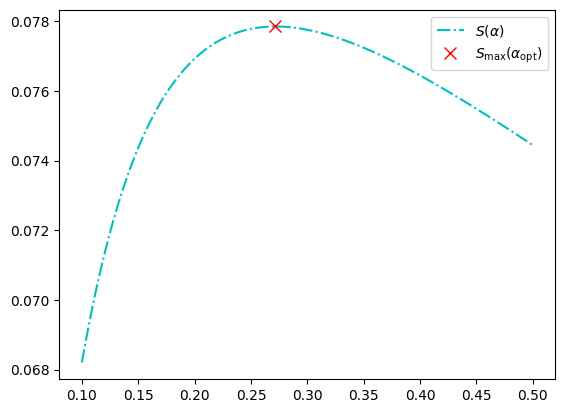

Using STO-1G 1sH (contracted) orbitals,
 the alpha that maximizes S overlap (providing energy minima) is


<IPython.core.display.Math object>

ENERGY with this exponent is E=-0.42424 ha
with Err(%)=15.15
--------
Note that for GTO 1sH orbitals, the optimal exponent obtained was


<IPython.core.display.Math object>

and that an error of 15.12% was obtained in the ENERGY despite the fact that


<IPython.core.display.Math object>

In [4]:
#plot
plt.plot(alfa_grid, np.array(S_allalfas), 'c-.', markersize=2, label=r'$S(\alpha)$')  # 'c.' is cyan color, dot markers
plt.plot(alfa_Smax, max(S_alfas), 'rx', markersize=8, label=r'$S_{\text{max}}(\alpha_{\text{opt}})$')  # Mark max S with 'rx'
plt.legend()
plt.show()
#RESULT ANALYSIS
alfa_opt_before=  0.28294212105115213 
eqa_bef_Lat= r"\alpha_{opt}^{GTO}="
eqa_ex_bef_Lat= r"\alpha_{exact}^{GTO}="
eqa_Lat= r"\alpha_{opt}^{STO-1G}=" +str(alfa_Smax)
eq_comp=r"abs \left(\alpha_{exact}^{GTO} - \alpha_{opt}^{GTO} \right)" +str('<') +"10^{-10}"

print('Using STO-1G 1sH (contracted) orbitals,\n the alpha that maximizes S overlap (providing energy minima) is')
display(Math(eqa_Lat))
E_calc= W(alfa_Smax)
abserr= abs(E_exact-E_calc)
relerr=abs(abserr/E_exact)*100
print(f'ENERGY with this exponent is E={E_calc:.5f} ha')
print(f'with Err(%)={relerr:.2f}')
print('--------')
print(f'Note that for GTO 1sH orbitals, the optimal exponent obtained was')
display(Math(eqa_bef_Lat+str(alfa_opt_before)))
print('and that an error of 15.12% was obtained in the ENERGY despite the fact that')
display(Math(eq_comp))


### -3-  Compute simultaneosly for both an H atom ($\zeta=1.00$) and $He^+$ ion, for whith $\zeta= 2.0$
#### (a) plot of the wavefuction $\psi$, the probability density $|\psi|^2=\psi^*\psi$ and the radial distribution fuction $RDF$ for the 1s STO, STO-1G, STO-2G and STO-3G. Their optimal exponents ad coefficients are those given.   
#### (b) Find the most probable electron-nucleus distance, the average electron nucleus distance, and the radius of a sphere around the nucleus containing the electron with a 99% of probability for the 1s STO and the three STO-NG functions.  

1) Basis set Wavefunctions have the forms seen in previous examples:
$$\chi_{1s}^{CGO}(r,\theta,\omega)= \sum_{p=1}^N d_p \chi_p^{GTO}(r,\theta,\omega)$$ 
$$\chi_{1s}^{GTO}(\alpha, r-\vec 0 )= N e^{-\alpha |{r-\vec 0}|^2}$$  
$$\chi_{1s}^{STO}(\zeta, r-\vec 0 )= \sqrt{(\zeta^3/\pi)} e^{-\zeta |{r-\vec 0}|}$$
2) $RDF(r)$ is $$RDF(r)= \int_\theta \int_\omega \int_0^r |\psi(r,\theta,\omega)|^2 dr d\theta d\omega = 4\pi \int_0^r r^2 \chi_{1s}^*(r) \chi_{1s}(r) dr = 4\pi r^2|\chi_{1s}|^2 $$
3) To generalise expression for an exponent $\alpha$ which $\zeta \neq 1$, one needs only to consider that exponents are scale factors which scale the function in r, so the $\alpha(\zeta=1)$ is sufficient to derive the optimal exponent as $$\alpha(\zeta)=\alpha(\zeta=1.00)\zeta^2$$

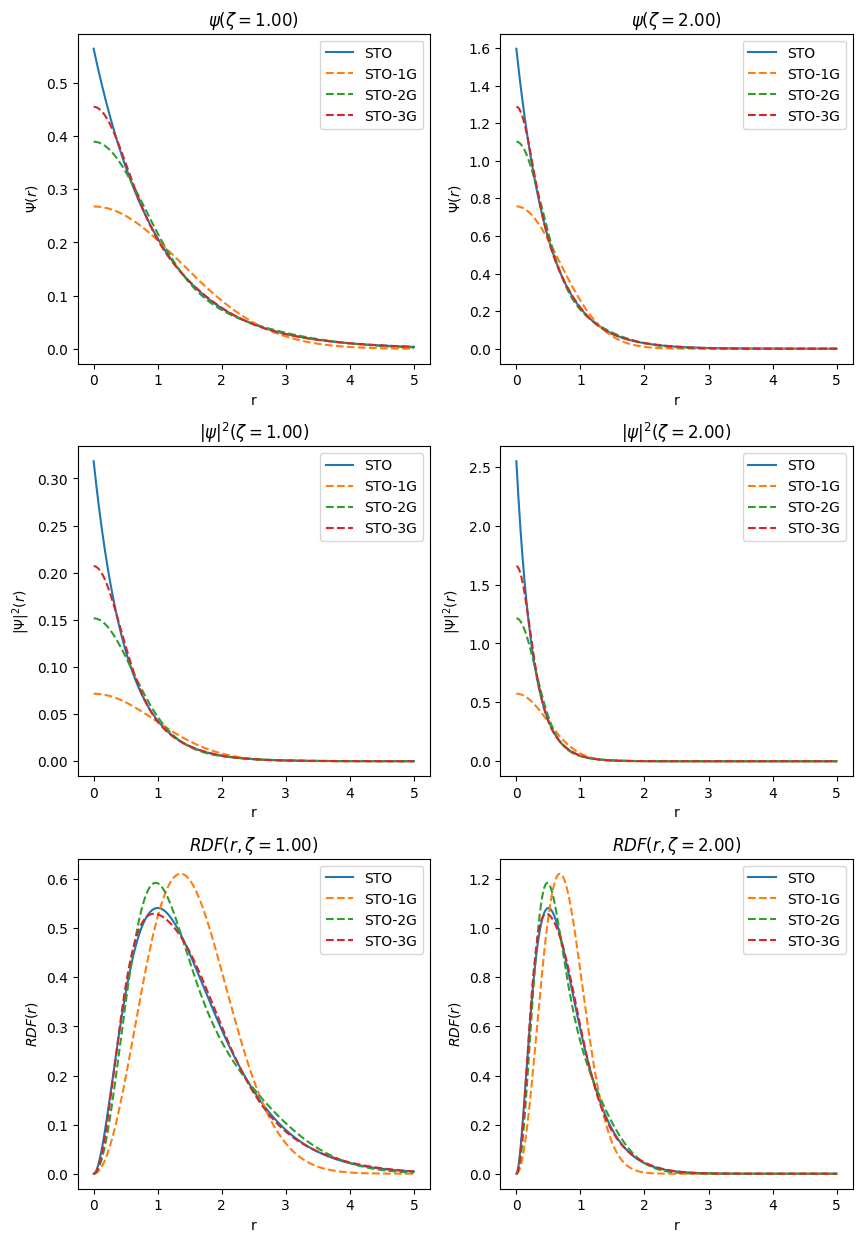

********* 
 STO, zeta = 1 :
More probable distance: r= 1.00000
50% probability: r=1.34375
99% probability: r=4.20625
********* 
 STO-1G, zeta = 1:
More probable distance: r= 1.35625
50% probability: r=1.48125
99% probability: r=3.24375
********* 
 STO-2G, zeta = 1:
More probable distance: r= 0.96875
50% probability: r=1.32500
99% probability: r=4.00000
********* 
 STO-3G, zeta = 1:
More probable distance: r= 0.94375
50% probability: r=1.35000
99% probability: r=4.22500
********* 
 STO, zeta = 2 :
More probable distance: r= 0.50000
50% probability: r=0.67500
99% probability: r=2.10625
********* 
 STO-1G, zeta = 2:
More probable distance: r= 0.68125
50% probability: r=0.74375
99% probability: r=1.62500
********* 
 STO-2G, zeta = 2:
More probable distance: r= 0.48125
50% probability: r=0.66250
99% probability: r=2.00000
********* 
 STO-3G, zeta = 2:
More probable distance: r= 0.46875
50% probability: r=0.67500
99% probability: r=2.11875


In [5]:
#Basis set: parameters + functions
alfas_z1 = np.array([[0.270950, 0, 0], [0.151623, 0.851819, 0], [0.109818, 0.405771, 2.22766]])
d = np.array([[1, 0, 0], [0.678914, 0.430129, 0], [0.444635, 0.535328, 0.154329]])

def STO(zeta,r):
    return np.sqrt(zeta**3/np.pi)*np.exp(-zeta*r)

def STO_NG(alfa,N,r):
    chi_r= 0.
    for i in range(3): #because len(d[N,:])=3 for N=1,2,3
        chi_r+= d[N,i]* (2*alfa[N,i]/np.pi)**(3/4)* np.exp(-alfa[N,i]*r**2)
    return chi_r

#MAIN (a)
r_grid=np.linspace(0,5,801)

#wf,PDF and RDF for both zeta=1,2
fig, axs = plt.subplots(3, 2, figsize=(10,15))
for i,zeta in (enumerate(range(1,3))):
    alfa= alfas_z1*zeta**2
    
    #wf
    # Wavefunction subplot
    axs[0, i].plot(r_grid, STO(zeta, r_grid), '-', label='STO')
    for N in range(3):
        axs[0, i].plot(r_grid, STO_NG(alfa,N,r_grid), '--', label=f'STO-{N+1}G')
        axs[0, i].set_title(f'$\psi(\zeta=$'+f'{zeta:.2f})')
        axs[0, i].set_xlabel('r')
        axs[0, i].set_ylabel(r'$\Psi(r)$')
        axs[0, i].legend()
    
    #probability density
    axs[1, i].plot(r_grid, STO(zeta, r_grid)**2, '-', label='STO')
    for N in range(3):
        axs[1, i].plot(r_grid, STO_NG(alfa,N,r_grid)**2, '--', label=f'STO-{N+1}G')
        axs[1, i].set_title(f'$|\psi|^2(\zeta=$'+f'{zeta:.2f})')
        axs[1, i].set_xlabel('r')
        axs[1, i].set_ylabel(r'$|\Psi|^2(r)$')
        axs[1, i].legend()
    
    #RDF
    axs[2, i].plot(r_grid, 4*np.pi*r_grid**2*STO(zeta, r_grid)**2, '-', label='STO')
    for N in range(3):
        axs[2, i].plot(r_grid, 4*np.pi*r_grid**2*STO_NG(alfa,N,r_grid)**2, '--', label=f'STO-{N+1}G')
        axs[2, i].set_title(f'$RDF(r,\zeta=$'+f'{zeta:.2f})')
        axs[2, i].set_xlabel('r')
        axs[2, i].set_ylabel(r'$RDF(r)$')
        axs[2, i].legend()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig('STO(-NGs).jpg')
plt.show()

#Probability Point Function for (b)
def PPF(function,r,prob):
    suma = 0.
    n = 0
    while suma < prob:
        suma += function[n]*(r[n+1]-r[n])
        n += 1
    return r[n]
##MAIN (b)
for zeta in range(1, 3):
    # results for STO
    r_mesprob_STO = r_grid[np.argmax(4*np.pi*r_grid**2*(STO(zeta,r_grid))**2)]
    r_av_STO = PPF((4*np.pi*r_grid**2*(STO(zeta,r_grid))**2),r_grid, 0.50)
    r_99prob_STO = PPF((4*np.pi*r_grid**2*(STO(zeta,r_grid))**2),r_grid, 0.99)
    print(f'********* \n STO, zeta = {zeta} :')
    print(f'More probable distance: r= {r_mesprob_STO:.5f}')
    print(f'50% probability: r={r_av_STO:.5f}')
    print(f'99% probability: r={r_99prob_STO:.5f}')
   # results for STO-NG
    for N in range(3):
        # results for STO-NG
        r_mesprob_NG = r_grid[np.argmax(4*np.pi*r_grid**2*(STO_NG(alfas_z1*zeta**2, N, r_grid))**2)]
        r_av_NG = PPF((4*np.pi*r_grid**2*(STO_NG(alfas_z1*zeta**2,N,r_grid))**2),r_grid, 0.50)
        r_99prob_NG = PPF((4*np.pi*r_grid**2*(STO_NG(alfas_z1*zeta**2,N,r_grid))**2),r_grid, 0.99)
        print(f'********* \n STO-{N + 1}G, zeta = {zeta}:')
        print(f'More probable distance: r= {r_mesprob_NG:.5f}')
        print(f'50% probability: r={r_av_NG:.5f}')
        print(f'99% probability: r={r_99prob_NG:.5f}')